# <font color='green'>[FB-z21mp] Volodymyr Duduladenko </font> 

## K-means Clustering

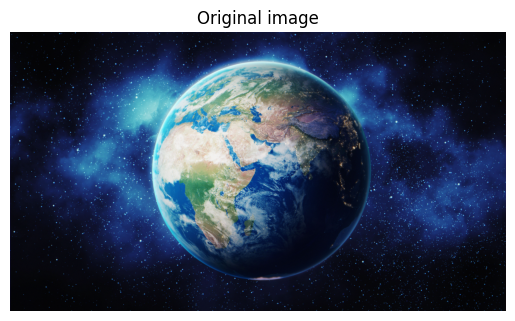

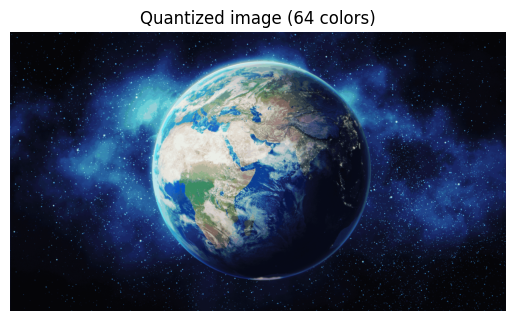

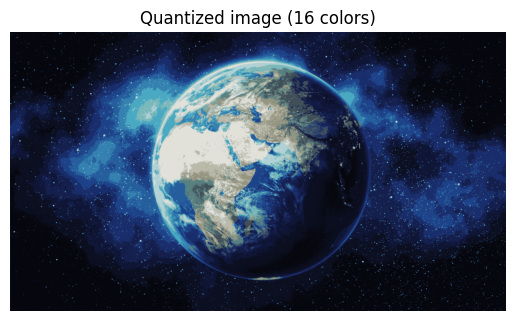

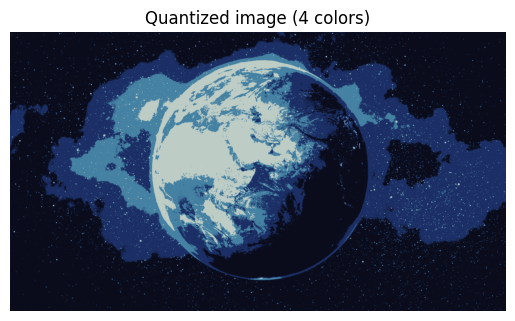

In [1]:
# K-means Clustering
# https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from skimage import io

# load image
img = io.imread('earth.jpg')

# convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
img = np.array(img, dtype=np.float64) / 255

# load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

# Fitting model on a small sub-sample of the data
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

# cluster with K-Means
def do_clustering(n_colors):
    kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0)
    kmeans.fit(image_array_sample)
    labels = kmeans.predict(image_array)
    return kmeans.cluster_centers_[labels].reshape(w, h, -1)

def show_image(title, image_data):
    plt.figure()
    plt.clf()
    plt.axis("off")
    plt.title(title)
    plt.imshow(image_data)
    #plt.show()

# show original image
show_image("Original image", img)

# show original image
for n_colors in [64, 16, 4]:
    title = f"Quantized image ({n_colors} colors)"
    image_data = do_clustering(n_colors)
    show_image(title, image_data)

## EM Clustering

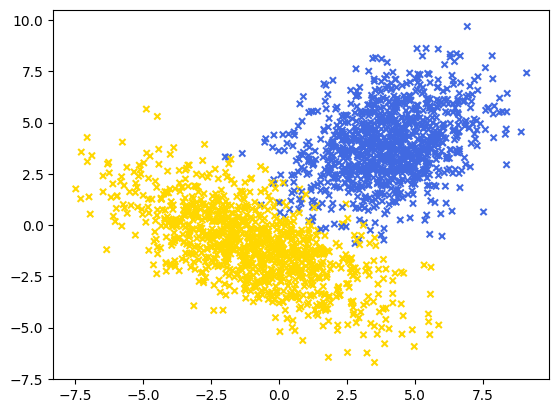

In [2]:
import pandas as pd
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

# generate data
num_points = 1000

mean_1 = [-1, -1]
cov_1 = [[6, -3], [-3, 3.5]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [4, 4]
cov_2 = [[3, 1], [1, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array(["gold"] * num_points + ["royalblue"] *  num_points)

X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, marker="x")

In [3]:
for i in reversed(range(2, 5)):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)
    print('means:')
    print(gmm.means_)
    print('covariances:')
    print(gmm.covariances_, "\n")

For n_clusters = 4  silhouette average: 0.3851114543637526
means:
[[ 4.92307578  5.07122338]
 [ 0.45178283 -1.79493426]
 [-2.34512365 -0.07751393]
 [ 3.41626595  3.15140175]]
covariances:
[[[ 2.17854256  0.28149821]
  [ 0.28149821  2.11525166]]

 [[ 3.80070584 -1.51011851]
  [-1.51011851  2.78378633]]

 [[ 3.63386389 -1.57947716]
  [-1.57947716  2.78120311]]

 [[ 2.27243146 -0.04314744]
  [-0.04314744  1.75021669]]] 

For n_clusters = 3  silhouette average: 0.39011367766136745
means:
[[ 4.92781029  5.01394183]
 [-0.91805687 -0.95969441]
 [ 3.35332581  3.11038393]]
covariances:
[[[ 2.11379343  0.2614783 ]
  [ 0.2614783   2.13342221]]

 [[ 5.64922347 -2.75525654]
  [-2.75525654  3.52546062]]

 [[ 2.21163878 -0.09304974]
  [-0.09304974  1.78440903]]] 

For n_clusters = 2  silhouette average: 0.5516847504876702
means:
[[ 4.03428655  3.93011741]
 [-0.93781368 -0.96964676]]
covariances:
[[[ 2.85186706  0.90337892]
  [ 0.90337892  2.96460994]]

 [[ 5.64581877 -2.79654476]
  [-2.79654476  3.54

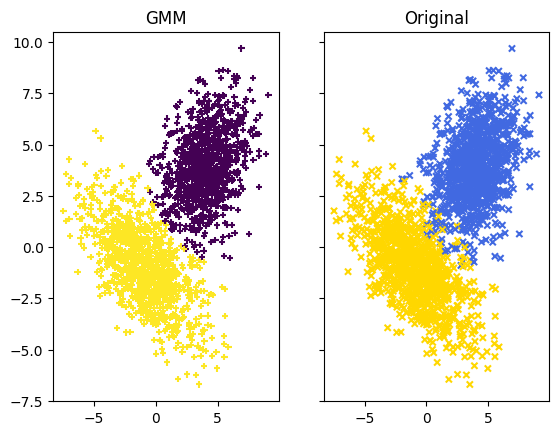

In [4]:
labels = gmm.predict(X)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=20, marker="+")
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=20, marker="x")